# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousedata_combined = study_results.merge(mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
mousedata_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice = mousedata_combined["Mouse ID"].drop_duplicates()
miceCount = mice.count()
miceCount

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousedata_combined_copy = mousedata_combined.transpose()
miceNotDuplicate = mousedata_combined.drop_duplicates()
miceNotDuplicateTranspose = miceNotDuplicate.transpose()
notDuplicateColumns = [index for index in miceNotDuplicateTranspose.columns]
for index in notDuplicateColumns:
    mousedata_combined_copy.pop(index)
duplicate_mouse = mousedata_combined_copy.transpose()

duplicate_mouse_id = ""
for x in duplicate_mouse["Mouse ID"]:
    duplicate_mouse_id = x
    print(f"Duplicate Mouse ID is {x}")

Duplicate Mouse ID is g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mousedata_combined.loc[mousedata_combined["Mouse ID"] == duplicate_mouse_id]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
miceNotDuplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = miceNotDuplicate["Mouse ID"].drop_duplicates()
miceCount = mice.count()
miceCount

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorVolumes = miceNotDuplicate[["Drug Regimen","Tumor Volume (mm3)"]]
tumorVolumesGrouped = tumorVolumes.groupby(["Drug Regimen"])

meanTumorDF = tumorVolumesGrouped.mean()
medianTumorDF = tumorVolumesGrouped.median()
tumorVarDF = tumorVolumesGrouped.var()
tumorStdDevDF = tumorVolumesGrouped.std()
tumorStdErrDF = tumorVolumesGrouped.sem()

drugRegimenJoin1 = meanTumorDF.join(medianTumorDF, how="left", lsuffix=' ')
drugRegimenJoin1.columns = ["Mean Tumor Volume", "Median Tumor Volume"]
drugRegimenJoin2 = drugRegimenJoin1.join(tumorVarDF, how="left", lsuffix=' ')
drugRegimenJoin3 = drugRegimenJoin2.join(tumorStdDevDF, how="left", lsuffix=' ')
drugRegimenJoin3.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",
                            "Tumor Volume Std. Dev."]
drugRegimenJoin4 = drugRegimenJoin3.join(tumorStdErrDF, how="left", lsuffix=' ')

drugRegimenJoin4.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",
                            "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

drugRegimenJoin4

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregateDF = tumorVolumesGrouped.agg(['mean', 'median','var','std','sem'])
aggregateDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

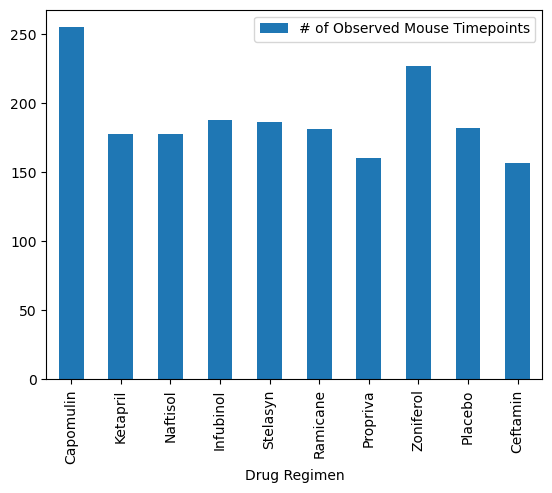

In [119]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
uniqueDrugRegimens = []
for drug in miceNotDuplicate["Drug Regimen"]:
    if drug not in uniqueDrugRegimens:
        uniqueDrugRegimens.append(drug)

timepointGrouped = miceNotDuplicate[["Drug Regimen", "Timepoint"]].groupby(["Drug Regimen"])
timepointsDF = pd.DataFrame(timepointGrouped.value_counts())
#10 zeros made to reflect 10 different drug regimens
observedTimepointsList = [0,0,0,0,0,0,0,0,0,0]
observedTimepointsCounts = []
tempCount1 = 0
for i in timepointsDF["count"]:
    if len(observedTimepointsCounts) > 2:
        if observedTimepointsCounts[len(observedTimepointsCounts) - 1] > observedTimepointsCounts[len(observedTimepointsCounts) - 2]:
            tempCount1 += 1
    observedTimepointsList[tempCount1] += i
    observedTimepointsCounts.append(i)
    
BarChartLabels = pd.DataFrame({'Drug Regimen': uniqueDrugRegimens, '# of Observed Mouse Timepoints': observedTimepointsList})
BarChartPlot = BarChartLabels.plot.bar(x='Drug Regimen', y='# of Observed Mouse Timepoints', rot=90)


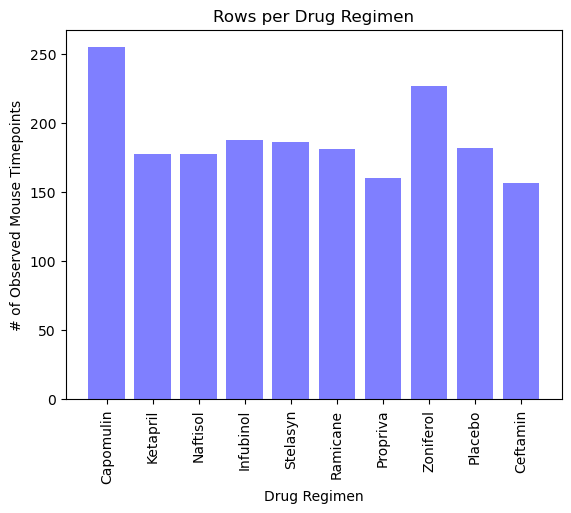

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(observedTimepointsList))
plt.bar(x_axis, observedTimepointsList, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, uniqueDrugRegimens,rotation='vertical')
plt.title("Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

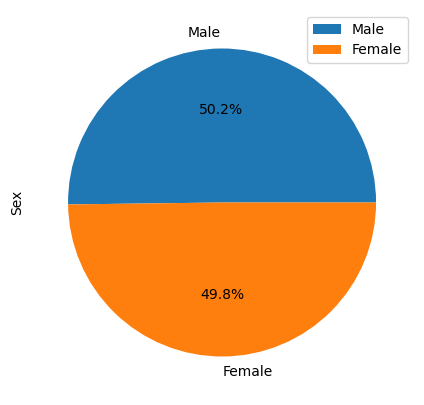

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderDF = miceNotDuplicate[["Mouse ID", "Sex"]]
genderDF_dropped_duplicates = genderDF.drop_duplicates()
maleCount = 0
femaleCount = 0
for i in genderDF_dropped_duplicates["Sex"]:
    if i == "Female":
        femaleCount += 1
    elif i == "Male":
        maleCount += 1

PieChartLabels = pd.DataFrame({"Genders": ["Male", "Female"],
                               "Sex": [maleCount, femaleCount]},
                             index = ["Male", "Female"])
PieChartLabels.plot.pie(y='Sex', figsize=(5, 5), autopct="%1.1f%%")

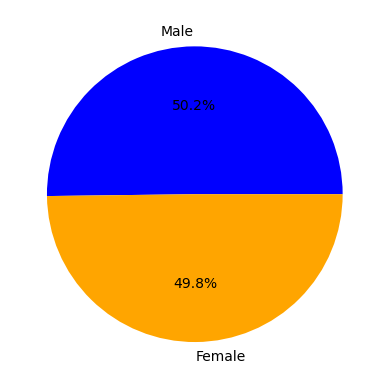

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [maleCount, femaleCount]
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepointDF = miceNotDuplicate[["Mouse ID", "Timepoint"]]
timepointReverseSort = timepointDF.sort_index(ascending = False)
timepointMaxTimepoint = timepointReverseSort["Mouse ID"].drop_duplicates()
timepointMaxTimepoint
timepointSortDF = timepointMaxTimepoint.sort_index()
timepointSortDF
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorFinalTimepoint = miceNotDuplicate.join(timepointSortDF, how="left", lsuffix=' ')
tumorFinalTimepointDropNA = tumorFinalTimepoint.dropna(how="any")
tumorFinalTimepointDropNA

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Mouse ID
1,f932,0,45.000000,0,Ketapril,Male,15,29,f932
20,x336,0,45.000000,0,Naftisol,Female,4,29,x336
53,h428,0,45.000000,0,Ketapril,Female,1,27,h428
55,v199,0,45.000000,0,Naftisol,Female,17,29,v199
109,o848,0,45.000000,0,Stelasyn,Female,14,27,o848
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,r944
1889,u364,45,31.023923,3,Capomulin,Male,18,17,u364
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,p438
1891,x773,45,58.634971,4,Placebo,Female,21,30,x773


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulinVolumes = tumorFinalTimepointDropNA["Tumor Volume (mm3)"].loc[tumorFinalTimepointDropNA["Drug Regimen"] == "Capomulin"]
ramicaneVolumes = tumorFinalTimepointDropNA["Tumor Volume (mm3)"].loc[tumorFinalTimepointDropNA["Drug Regimen"] == "Ramicane"]
infubinolVolumes = tumorFinalTimepointDropNA["Tumor Volume (mm3)"].loc[tumorFinalTimepointDropNA["Drug Regimen"] == "Infubinol"]
ceftaminVolumes = tumorFinalTimepointDropNA["Tumor Volume (mm3)"].loc[tumorFinalTimepointDropNA["Drug Regimen"] == "Ceftamin"]

capomulinQuartiles = capomulinVolumes.quantile([.25,.5,.75])
capomulinLowerq = capomulinQuartiles[0.25]
capomulinUpperq = capomulinQuartiles[0.75]
capomulinIqr = capomulinUpperq-capomulinLowerq

ramicaneQuartiles = ramicaneVolumes.quantile([.25,.5,.75])
ramicaneLowerq = ramicaneQuartiles[0.25]
ramicaneUpperq = ramicaneQuartiles[0.75]
ramicaneIqr = ramicaneUpperq-ramicaneLowerq

infubinolQuartiles = infubinolVolumes.quantile([.25,.5,.75])
infubinolLowerq = infubinolQuartiles[0.25]
infubinolUpperq = infubinolQuartiles[0.75]
infubinolIqr = infubinolUpperq-infubinolLowerq

ceftaminQuartiles = ceftaminVolumes.quantile([.25,.5,.75])
ceftaminLowerq = ceftaminQuartiles[0.25]
ceftaminUpperq = ceftaminQuartiles[0.75]
ceftaminIqr = ceftaminUpperq-ceftaminLowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 

    
    # Determine outliers using upper and lower bounds    
outliers = False
for i in capomulinVolumes:
    if i > 1.5*capomulinIqr + capomulinUpperq or i < capomulinLowerq - 1.5*capomulinIqr:
        outliers = True
        print(f"Capomulin has a Tumor Volume outlier of {i} (mm3)")
        
if outliers == False:
    print("Capomulin has no outliers")
    
outliers = False    
for i in ramicaneVolumes:
    if i > 1.5*ramicaneIqr + ramicaneUpperq or i < ramicaneLowerq - 1.5*ramicaneIqr:
        outliers = True
        print(f"Ramicane has a Tumor Volume outlier of {i} (mm3)")
        
if outliers == False:
    print("Ramicane has no outliers")

outliers = False
for i in infubinolVolumes:
    if i > 1.5*infubinolIqr + infubinolUpperq or i < infubinolLowerq - 1.5*infubinolIqr:
        outliers = True
        print(f"Infubinol has a Tumor Volume outlier of {i} (mm3)")
        
if outliers == False:
    print("Infubinol has no outliers")

outliers = False
for i in ceftaminVolumes:
    if i > 1.5*ceftaminIqr + ceftaminUpperq or i < ceftaminLowerq - 1.5*ceftaminIqr:
        outliers = True
        print(f"Ceftamin has a Tumor Volume outlier of {i} (mm3)")
        
if outliers == False:
    print("Ceftamin has no outliers")


Capomulin has no outliers
Ramicane has no outliers
Infubinol has a Tumor Volume outlier of 36.3213458 (mm3)
Ceftamin has no outliers


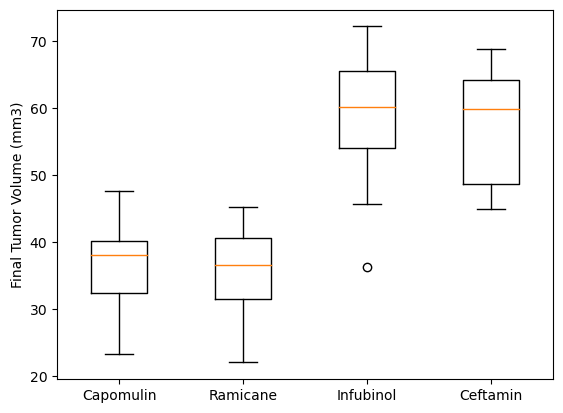

In [173]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
v1 = capomulinVolumes
v2 = ramicaneVolumes
v3 = infubinolVolumes
v4 = ceftaminVolumes

volumes = [v1,v2,v3,v4]

fig1, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(volumes)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

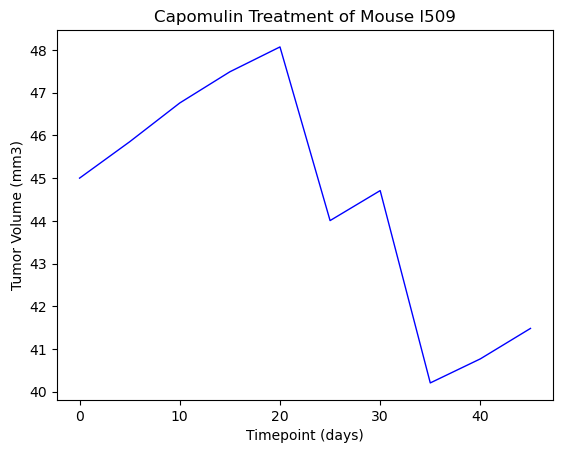

In [177]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
CapomulinDF = miceNotDuplicate[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].loc[miceNotDuplicate["Mouse ID"] == "l509"]
x_axis = [timepoint for timepoint in CapomulinDF["Timepoint"]]
l509Volumes = [volume for volume in CapomulinDF["Tumor Volume (mm3)"]]
plt.plot(x_axis, l509Volumes, linewidth=1, color="blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [227]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
secondCapomulinDF = miceNotDuplicate[["Mouse ID", "Tumor Volume (mm3)"]].loc[miceNotDuplicate["Drug Regimen"]=="Capomulin"]

thirdCapomulinDF = secondCapomulinDF.groupby(["Mouse ID"]).mean()
capomulinMiceIDs = thirdCapomulinDF.transpose().columns
capomulinMiceWeights = []
for mice in capomulinMiceIDs:
    weight = miceNotDuplicate["Weight (g)"].loc[miceNotDuplicate["Mouse ID"]==mice]
    print(weight)
    capomulinMiceWeights.append(weight[0])
# fourthCapomulinDF = miceNotDuplicate[["Mouse ID", "Weight (g)"]]

# fifthCapomulinDF = fourthCapomulinDF.join(capomulinMeanTumorVolume, how="outer", lsuffix=' ')
# finalCapomulinDF = fifthCapomulinDF.dropna(how="any")
# fourthCapomulinDF

# capomulinMiceWeights




0       22
472     22
679     22
719     22
933     22
1268    22
1400    22
1547    22
1629    22
1764    22
Name: Weight (g), dtype: int64
229     21
327     21
682     21
839     21
935     21
1224    21
1308    21
1614    21
1676    21
1829    21
Name: Weight (g), dtype: int64


KeyError: 0

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


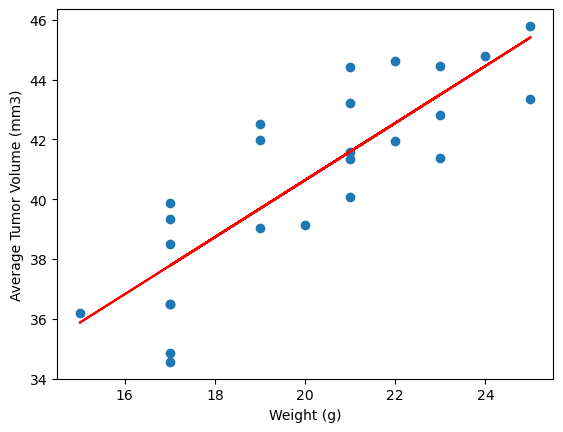

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
